# **Import Library**

In [57]:
# Untuk Manipulasi Data
import pandas as pd
import numpy as np

# Untuk Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk Machine Learning Model
import xgboost as xgb

# Mengatur beberapa opsi tampilan agar lebih rapi
pd.set_option('display.max_columns', None) # Tampilkan semua kolom
sns.set_style('whitegrid') # Atur gaya plot seaborn

print("✅ Library berhasil diimpor!")

✅ Library berhasil diimpor!


# **Load Dataset**

In [58]:
# Upload file CSV
from google.colab import files
uploaded = files.upload()

# Load data dari file yang di-upload
df = pd.read_csv('AmesHousing.csv')

print(f'Dataset berhasil dimuat. Terdiri dari {df.shape[0]} baris dan {df.shape[1]} kolom.')

# Untuk Menampilkan 5 baris pertama dari dataset
print('\nBerikut adalah 5 baris pertama dari data anda:')
df.head()

Saving AmesHousing.csv to AmesHousing (1).csv
Dataset berhasil dimuat. Terdiri dari 2930 baris dan 82 kolom.

Berikut adalah 5 baris pertama dari data anda:


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# **Menangani Missing Value**

Persentase data hilang di setiap kolom (yang ada data hilangnya):

Pool QC           99.556314
Misc Feature      96.382253
Alley             93.242321
Fence             80.477816
Mas Vnr Type      60.580205
Fireplace Qu      48.532423
Lot Frontage      16.723549
Garage Qual        5.426621
Garage Cond        5.426621
Garage Yr Blt      5.426621
Garage Finish      5.426621
Garage Type        5.358362
Bsmt Exposure      2.832765
BsmtFin Type 2     2.764505
Bsmt Cond          2.730375
Bsmt Qual          2.730375
BsmtFin Type 1     2.730375
Mas Vnr Area       0.784983
Bsmt Full Bath     0.068259
Bsmt Half Bath     0.068259
BsmtFin SF 1       0.034130
BsmtFin SF 2       0.034130
Electrical         0.034130
Total Bsmt SF      0.034130
Bsmt Unf SF        0.034130
Garage Area        0.034130
Garage Cars        0.034130
dtype: float64


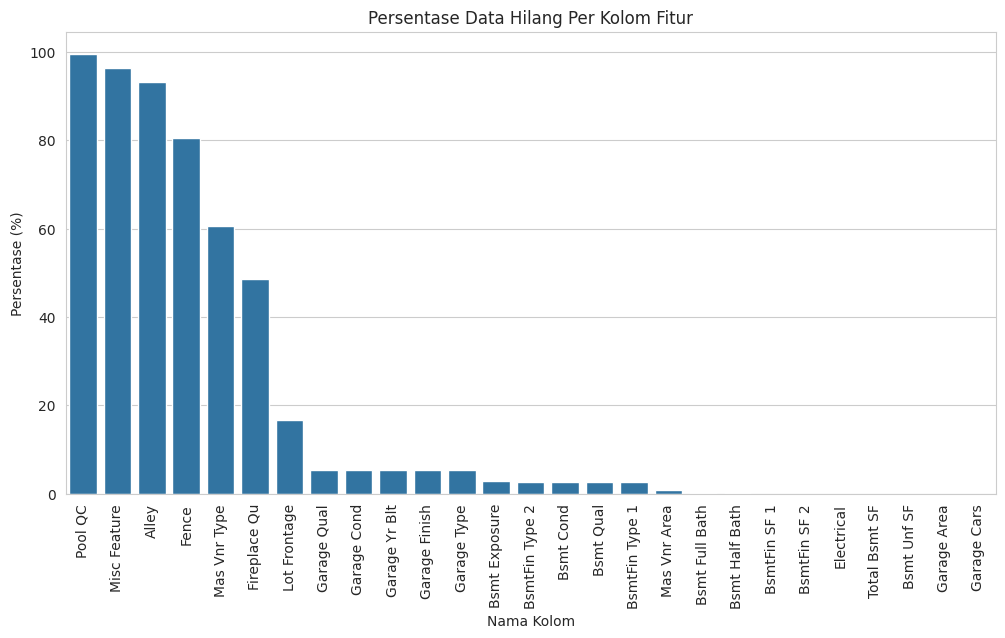

In [59]:
# Untuk Hitung Persentase Data yang Hilang
missing_percentage = df.isnull().sum() / len(df) * 100
missing_info = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
print("Persentase data hilang di setiap kolom (yang ada data hilangnya):\n")
print(missing_info)

# Visualisasikan Data Hilang
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_info.index, y=missing_info)
plt.xticks(rotation=90)
plt.title('Persentase Data Hilang Per Kolom Fitur')
plt.xlabel('Nama Kolom')
plt.ylabel('Persentase (%)')
plt.show()


In [60]:
# Tentukan Kolom Yang Ingin Dihapus (Lebih dari 50%)
cols_to_drop = missing_info[missing_info > 50].index.tolist()

print("\n------------------------------------------------------")
print(f"\nKolom yang akan dihapus (karena >50% datanya hilang): {cols_to_drop}")

# Hapus Kolom
df.drop(columns=cols_to_drop, inplace=True)

print(f"\n✅ Kolom berhasil dihapus. Bentuk data sekarang: {df.shape}")
print("Data kita sekarang memiliki lebih sedikit kolom, tetapi lebih bersih.")


------------------------------------------------------

Kolom yang akan dihapus (karena >50% datanya hilang): ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Mas Vnr Type']

✅ Kolom berhasil dihapus. Bentuk data sekarang: (2930, 77)
Data kita sekarang memiliki lebih sedikit kolom, tetapi lebih bersih.


# **Hapus Fitur Tidak Relevan**

In [61]:
# HAPUS KOLOM TIDAK RELEVAN
df_cleaned = df.drop(columns=['Order', 'PID'])

print("Kolom 'Order' dan 'PID' berhasil dihapus.")
print(f"Bentuk data baru: {df_cleaned.shape}")

# Selanjutnya, semua proses (data cleaning, encoding, training) harus menggunakan df_cleaned
df_cleaned.head()

Kolom 'Order' dan 'PID' berhasil dihapus.
Bentuk data baru: (2930, 75)


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,189900


# **Mengisi Sisa Data Yang Hilang**

In [62]:
# Dapatkan daftar kolom yang masih memiliki data kosong
cols_with_missing_data = df_cleaned.columns[df_cleaned.isnull().any()].tolist()

print(f"Ditemukan {len(cols_with_missing_data)} kolom yang akan diisi datanya:\n{cols_with_missing_data}\n")
print("------------------------------------------------------")
print("Memulai proses pengisian data hilang (imputasi)...\n")


# 2. Lakukan Imputasi dengan metode yang lebih aman
for col in cols_with_missing_data:
    # Cek apakah tipe kolom adalah angka (numerik)
    if pd.api.types.is_numeric_dtype(df_cleaned[col]):
        median_val = df_cleaned[col].median()
        # Isi data kosong dengan median
        df_cleaned[col] = df_cleaned[col].fillna(median_val)
        print(f"Kolom numerik '{col}' diisi dengan median: {median_val}")
    # Jika bukan angka, berarti kategorikal
    else:
        mode_val = df_cleaned[col].mode()[0]
        # Isi data kosong dengan modus
        df_cleaned[col] = df_cleaned[col].fillna(mode_val)
        print(f"Kolom kategorikal '{col}' diisi dengan modus: '{mode_val}'")

# 3. Verifikasi Terakhir
missing_final_check = df_cleaned.isnull().sum().sum()

print("\n------------------------------------------------------")
if missing_final_check == 0:
    print("\n✅ Verifikasi sukses! Tidak ada lagi data yang hilang di dalam dataset.")
else:
    print(f"\n⚠️ Masih ada {missing_final_check} data yang hilang. Perlu dicek kembali.")

Ditemukan 22 kolom yang akan diisi datanya:
['Lot Frontage', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Electrical', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond']

------------------------------------------------------
Memulai proses pengisian data hilang (imputasi)...

Kolom numerik 'Lot Frontage' diisi dengan median: 68.0
Kolom numerik 'Mas Vnr Area' diisi dengan median: 0.0
Kolom kategorikal 'Bsmt Qual' diisi dengan modus: 'TA'
Kolom kategorikal 'Bsmt Cond' diisi dengan modus: 'TA'
Kolom kategorikal 'Bsmt Exposure' diisi dengan modus: 'No'
Kolom kategorikal 'BsmtFin Type 1' diisi dengan modus: 'GLQ'
Kolom numerik 'BsmtFin SF 1' diisi dengan median: 370.0
Kolom kategorikal 'BsmtFin Type 2' diisi dengan modus: 'Unf'
Kolom numerik 'BsmtFin SF 2' diisi dengan

# **Encoding Variabel Kategorikal**

In [63]:
# Simpan Harga Jual (Target) dan Hapus dari Dataframe Utama agar tidak ikut di encode
target = df_cleaned['SalePrice']
df_cleaned_features = df_cleaned.drop('SalePrice', axis=1)
print('Bentuk Data Sebelum encoding: ', df_cleaned_features.shape)

# Kita Lakukan ONE-HOT ENCODING Pada Semua Kolom Kategorikal
# pd.get_dummies() secara otomatis akan menemukan dan mengubah semua kolom teks
df_cleaned_encoded = pd.get_dummies(df_cleaned_features)

print("Bentuk data fitur setelah encoding:", df_cleaned_encoded.shape)
print("\nPerhatikan bagaimana jumlah kolom bertambah secara signifikan.")
print("Ini karena setiap kategori unik di kolom teks diubah menjadi kolom baru.")

# Tampilkan 5 Baris Pertama Dari Data Yang Sudah Di Encode
print("\nBerikut adalah 5 baris pertama dari data yang sudah siap untuk model:")
df_cleaned_encoded.head()

Bentuk Data Sebelum encoding:  (2930, 74)
Bentuk data fitur setelah encoding: (2930, 284)

Perhatikan bagaimana jumlah kolom bertambah secara signifikan.
Ini karena setiap kategori unik di kolom teks diubah menjadi kolom baru.

Berikut adalah 5 baris pertama dari data yang sudah siap untuk model:


,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Gtl,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Artery,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_ClyTile,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_Plywood,Exterior 2nd_PreCast,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Exter Qual_Ex,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Ex,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Ex,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Ex,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Av,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,BsmtFin Type 1_ALQ,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_ALQ,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Ex,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_N,Central Air_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Func

# **Membagi Data menjadi Set Latihan dan Set Tes**

***Sebelum melatih model, kita harus membagi data kita menjadi dua bagian:***

***1. Data Latih: Sekitar 80% dari data. Bagian ini akan kita "berikan" ke model untuk dipelajari polanya.***

***2. Data Uji: Sisa 20% dari data. Bagian ini akan kita simpan dan gunakan untuk menguji seberapa baik model kita setelah dilatih. Model belum pernah "melihat" data ini sebelumnya.***

***Ini sangat penting untuk menghindari overfitting, yaitu kondisi di mana model hanya hafal data latihan tetapi tidak bisa bekerja baik pada data baru.***

In [64]:
# Import Fungsi Yang Dibutuhkan
from sklearn.model_selection import train_test_split

# Pisahkan Data
# X= Fitur (Semua Kolom Yang Sudah Di-Encode)
# y= Target (Kolom SalePrice)

X = df_cleaned_encoded
y = target

# Kita bagi data menjadi 80% untuk latihan dan 20% untuk pengujian
# random_state=42 memastikan pembagian data selalu sama setiap kali kode dijalankan
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Data Berhasil Dibagi: ')
print(f"Bentuk X_train (fitur latihan): {X_train.shape}")
print(f"Bentuk X_test (fitur tes):     {X_test.shape}")
print(f"Bentuk y_train (target latihan): {y_train.shape}")
print(f"Bentuk y_test (target tes):     {y_test.shape}")

Data Berhasil Dibagi: 
Bentuk X_train (fitur latihan): (2344, 284)
Bentuk X_test (fitur tes):     (586, 284)
Bentuk y_train (target latihan): (2344,)
Bentuk y_test (target tes):     (586,)


# **Melatih Model XGBoost**

In [65]:
# Buat instance dari model XGBoost
# Kita menggunakan XGBRegressor karena tugas kita adalah prediksi angka (regresi)
# n_estimators adalah jumlah 'pohon' yang akan dibangun model.
# learning_rate mengontrol seberapa cepat model belajar.
# random_state=42 untuk hasil yang konsisten.

xgboost_model = xgb.XGBRegressor(objective='reg:squarederror',
                                 n_estimators=1000,
                                 learning_rate=0.05,
                                 random_state=42)

# Latih Model Menggunakan Data Latih

print('\nMemulai Pelatihan Model XGBoost...')
# Model akan mempelajari hubungan antara fitur di X_train dan harga di y_train
xgboost_model.fit(X_train, y_train)

print("\n✅ Model XGBoost berhasil dilatih!")


Memulai Pelatihan Model XGBoost...

✅ Model XGBoost berhasil dilatih!


# **Evaluasi Performa Model**

--- Hasil Evaluasi Model ---
R-squared (R²): 0.9261
Mean Absolute Error (MAE): $14,337.53
----------------------------

Artinya, secara rata-rata, prediksi model Anda meleset sekitar $14,337.53 dari harga rumah sebenarnya.
Dan model Anda dapat menjelaskan sekitar 92.61% dari variasi harga rumah di dataset tes.


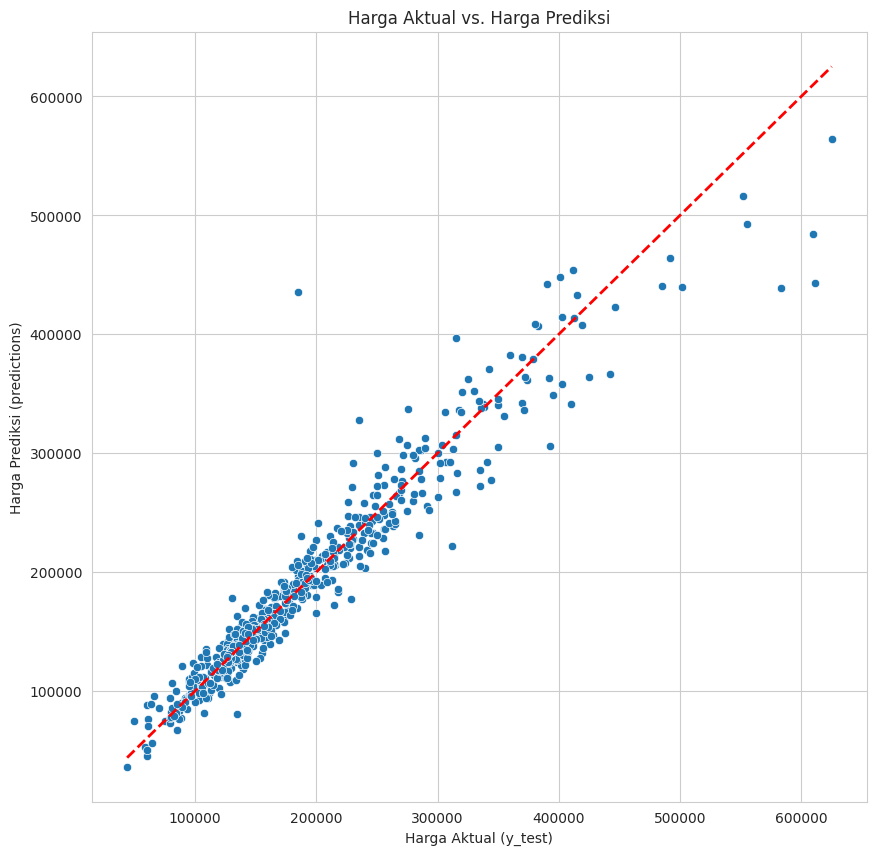

In [66]:
# Import Metrik Evaluasi
from sklearn.metrics import mean_absolute_error, r2_score

# Buat Prediksi Menggunakan Data Uji
predictions = xgboost_model.predict(X_test)

# Hitung Metrik Evaluasi
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("--- Hasil Evaluasi Model ---")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print("----------------------------")

# Penjelasan Metrik
print(f"\nArtinya, secara rata-rata, prediksi model Anda meleset sekitar ${mae:,.2f} dari harga rumah sebenarnya.")
print(f"Dan model Anda dapat menjelaskan sekitar {r2:.2%} dari variasi harga rumah di dataset tes.")

# Visualisasikan Hasil Prediksi
plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test, y=predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, linestyle='--') # Garis diagonal
plt.xlabel('Harga Aktual (y_test)')
plt.ylabel('Harga Prediksi (predictions)')
plt.title('Harga Aktual vs. Harga Prediksi')
plt.show()

# ***Melihat Fitur Paling Berpengaruh Pada Harga***

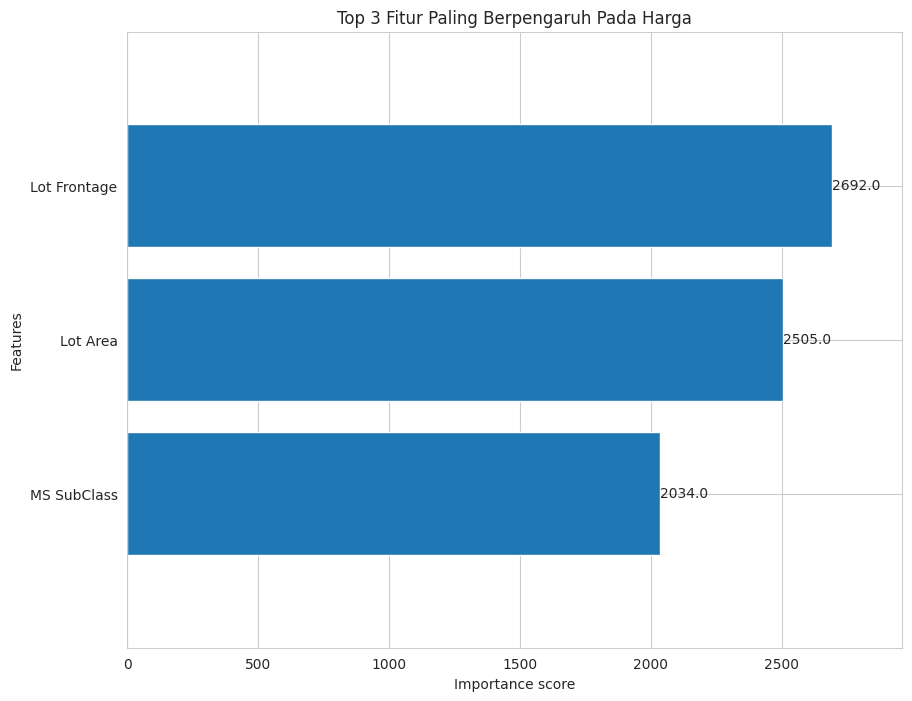

In [67]:
# Buat plot untuk feature importance
plt.figure(figsize=(10, 8))
# Ambil 3 fitur paling penting
xgb.plot_importance(xgboost_model, max_num_features=3, height=0.8, ax=plt.gca())
plt.title('Top 3 Fitur Paling Berpengaruh Pada Harga')
plt.show()